[[ 285   19    4   17    8]
 [ 167  110   94   12   21]
 [ 449  466 2675 1855  290]
 [  41   26   31  950  115]
 [ 248  222  496   69  815]]
[[0.85585586 0.05705706 0.01201201 0.05105105 0.02402402]
 [0.41336634 0.27227723 0.23267327 0.02970297 0.0519802 ]
 [0.07829119 0.08125545 0.46643418 0.32345248 0.0505667 ]
 [0.03525365 0.02235598 0.0266552  0.81685297 0.0988822 ]
 [0.13405405 0.12       0.26810811 0.0372973  0.44054054]]


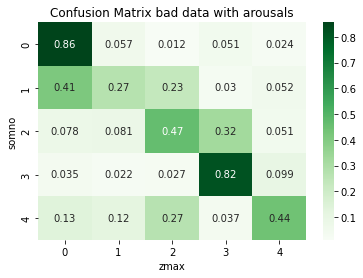

In [2]:
#bad data leonora vs zmax

# -*- coding: utf-8 -*-
"""
Created on Sun Jan  2 03:51:45 2022

@author: user
"""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn

list_of_nights = [11, 19, 32, 38, 57, 59, 73, 81, 83, 84, 85, 87]
# no 23 86 70
dfLeonora = pd.DataFrame(columns=['scorer', 'else'])

dfQs = pd.DataFrame(columns=['scorer'])

for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


    dfLeonora = dfLeonora.append(df_Konsens, ignore_index=True)

# Here i download all txtcsv as pandas dataframes
    df_scorer1= pd.read_csv('redact_qs1_'+i+'.txt', delimiter='\t')
    dfQs = dfQs.append(df_scorer1, ignore_index=True)

dfLeonora_negative = dfLeonora.loc[(dfLeonora['scorer'] < 0)].index
dfQs_negative = dfQs.loc[(dfQs['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
df_all_negative_values_to_drop = dfLeonora_negative.union(dfQs_negative)

dfLeonora = dfLeonora[~dfLeonora.index.isin(df_all_negative_values_to_drop)]
dfQs = dfQs[~dfQs.index.isin(df_all_negative_values_to_drop)]


dfLeonora = dfLeonora.rename(columns={'scorer': 'leo_score'})
dfQs = dfQs.rename(columns={'scorer': 'qs_score'})



AllNightsDF = pd.concat([dfLeonora, dfQs], axis=1,)


AllNightsDF = AllNightsDF.drop(columns='Unnamed: 0')

leo_score = AllNightsDF['leo_score'].tolist()
qs_score = AllNightsDF['qs_score'].tolist()
df_confusion = confusion_matrix(leo_score, qs_score)
print (df_confusion)

cmn = df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis]
print (cmn)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('zmax');ax.set_ylabel('somno'); 
ax.set_title('Confusion Matrix bad data with arousals'); 


[[ 278   19    4   17    7]
 [  97  103   72    9   17]
 [ 368  456 2592 1826  280]
 [  30   26   27  947  114]
 [ 200  210  480   69  789]]
[[0.85538462 0.05846154 0.01230769 0.05230769 0.02153846]
 [0.32550336 0.34563758 0.24161074 0.03020134 0.05704698]
 [0.06664252 0.08257878 0.46939515 0.33067729 0.05070627]
 [0.02622378 0.02272727 0.0236014  0.8277972  0.09965035]
 [0.11441648 0.1201373  0.27459954 0.03947368 0.451373  ]]


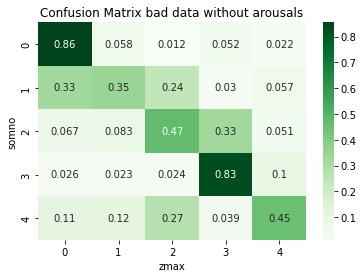

In [13]:
#now the same bad data but without aro
dfLeonoraNoAro = dfLeonora.loc[(dfLeonora['else'] == 1)].index
dfLeonora = dfLeonora[~dfLeonora.index.isin(dfLeonoraNoAro)]
dfQs = dfQs[~dfQs.index.isin(dfLeonoraNoAro)]
AllNightsDFwithoutAro = pd.concat([dfLeonora, dfQs], axis=1,)
#df_confusion_no_aro = pd.crosstab(AllNightsDFwithoutAro['leo_score'], AllNightsDFwithoutAro['qs_score'])
leo_score = AllNightsDFwithoutAro['leo_score'].tolist()
qs_score = AllNightsDFwithoutAro['qs_score'].tolist()
df_confusion_no_aro = confusion_matrix(leo_score, qs_score)
print (df_confusion_no_aro)
cmn_no_aro = df_confusion_no_aro.astype('float') / df_confusion_no_aro.sum(axis=1)[:, np.newaxis]
print (cmn_no_aro)
#plot_confusion_matrix(df_confusion_no_aro)
sn.heatmap(cmn_no_aro, annot=True)
ax= plt.subplot()
sn.heatmap(cmn_no_aro, annot=True, cmap="Greens")
ax.set_xlabel('zmax');ax.set_ylabel('somno'); 
ax.set_title('Confusion Matrix bad data without arousals');

In [3]:
# bad data statistics without aro
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
leo_score = AllNightsDFwithoutAro['leo_score'].tolist()
qs_score = AllNightsDFwithoutAro['qs_score'].tolist()
print ('accuracy withour Aro is ', accuracy_score(leo_score, qs_score))
print (precision_score(leo_score, qs_score, average='macro'))
print (precision_score(leo_score, qs_score, average='micro'))
print (precision_score(leo_score, qs_score, average='weighted'))
print (recall_score(leo_score, qs_score, average='macro'))
print (recall_score(leo_score, qs_score, average='micro'))
print (recall_score(leo_score, qs_score, average='weighted'))
print (f1_score(leo_score, qs_score, average='macro'))
print (f1_score(leo_score, qs_score, average='micro'))
print (f1_score(leo_score, qs_score, average='weighted'))
print (cohen_kappa_score(leo_score, qs_score))

#for cappa cofidence interval
from sklearn.metrics import confusion_matrix
import math
confusion = confusion_matrix(leo_score, qs_score)
n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)


w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 


expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)

agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(leo_score, qs_score) - 1.96*SE
second_interval_number = cohen_kappa_score(leo_score, qs_score) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

accuracy withour Aro is  0.5210800044262477
0.44250198997375134
0.5210800044262477
0.6815305702312153
0.589917509294418
0.5210800044262477
0.5210800044262477
0.443152923765384
0.5210800044262477
0.5487903182655287
0.32780147540119786
cohen kappa is
0.32780147540119786
expected agreement is  0.28753191498063324
N is  9037
agreement is  0.5210800044262477
0.0037440096786304786
confidence interval fo kappa is from  0.3204632164310821 to  0.3351397343713136
my cohens kappa is  0.3278014754011978


In [4]:
#with aro
leo_score = AllNightsDF['leo_score'].tolist()
qs_score = AllNightsDF['qs_score'].tolist()
print ('accuracy withour Aro is ', accuracy_score(leo_score, qs_score))
print (precision_score(leo_score, qs_score, average='macro'))
print (precision_score(leo_score, qs_score, average='micro'))
print (precision_score(leo_score, qs_score, average='weighted'))
print (recall_score(leo_score, qs_score, average='macro'))
print (recall_score(leo_score, qs_score, average='micro'))
print (recall_score(leo_score, qs_score, average='weighted'))
print (f1_score(leo_score, qs_score, average='macro'))
print (f1_score(leo_score, qs_score, average='micro'))
print (f1_score(leo_score, qs_score, average='weighted'))
print (cohen_kappa_score(leo_score, qs_score))

accuracy withour Aro is  0.5097522403795467
0.4320715819205995
0.5097522403795467
0.6714864655295266
0.5703921533393601
0.5097522403795467
0.5097522403795467
0.4272184509524962
0.5097522403795467
0.5385714638880601
0.31742571550805554


In [5]:
#for cappa cofidence interval
from sklearn.metrics import confusion_matrix
import math
confusion = confusion_matrix(leo_score, qs_score)
n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 


expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)

agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(leo_score, qs_score) - 1.96*SE
second_interval_number = cohen_kappa_score(leo_score, qs_score) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

cohen kappa is
0.31742571550805554
expected agreement is  0.2817664380876055
N is  9485
agreement is  0.5097522403795467
0.0036866712143515663
confidence interval fo kappa is from  0.3101998399279265 to  0.3246515910881846
my cohens kappa is  0.31742571550805565


<Figure size 432x288 with 0 Axes>

[[0.87968952 0.05447469 0.00801282 0.02814685 0.02967611]
 [0.39039652 0.31479912 0.22541326 0.02245794 0.04693317]
 [0.07563198 0.07493593 0.46818344 0.33408186 0.04716679]
 [0.04086463 0.02031107 0.02648687 0.82770216 0.08463527]
 [0.12409543 0.11033324 0.2273428  0.03166923 0.50655929]]
list of cohens kappa
[0.5902152755961615, 0.5669267496120384, 0.48552965867668174, 0.6576623452407582, 0.5730283768603345, 0.2729800340846552, 0.4039598889843389, 0.0550354233652427, 0.05833729216152017, 0.12663262008875564, 0.11813165953785021, 0.192716680892699]
mean of cohens kappa list is  0.3417630004250863
stdev of cohens_kappa_list is  0.2190930960604663
      Unnamed: 0  qs_score  leo_score  else
0              0         0          0     0
1              1         0          0     0
2              2         0          0     0
3              3         0          0     0
4              4         0          0     0
...          ...       ...        ...   ...
9480         858         2          2

<Figure size 432x288 with 0 Axes>

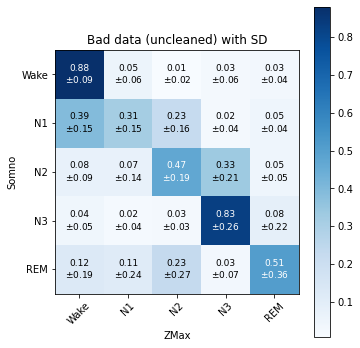

In [3]:
# all bad data nights in cms and mean of each list
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [11, 19, 32, 38, 57, 59, 73, 81, 83, 84, 85, 87]
# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('redact_qs1_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]


    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'qs_score'})

    # makeing confusion matrix for everz night 

    #df_confusion_night = pd.crosstab(df_Konsens['leo_score'], df_scorer1['qs_score'])
    #print (df_confusion_night)
    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['qs_score']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')

    cmn_night = df_confusion_night

    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)





plt.tight_layout()

plt.show()


#makint arraz for matrix, each list in list correcponds a row
DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]
# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
print (ArrayDataCMMean)

def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Bad data (uncleaned) with SD")
    plt.rc('font', size=12) 
    plt.ylabel('Somno')
    plt.xlabel('ZMax')

# Plot non-normalized confusion matrix
class_list = ['Wake','N1','N2','N3','REM']
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('Bad_data_uncleaned_with_SD.png', bbox_inches='tight')



print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)
print (AllNightsDF['qs_score'].value_counts())
print (AllNightsDF['leo_score'].value_counts())

ValueContsDF = AllNightsDF['qs_score'].value_counts()
ValueContsDF1 = AllNightsDF['leo_score'].value_counts()
SZEpochNumberDF = pd.concat([ValueContsDF, ValueContsDF1], axis = 1)


print (SZEpochNumberDF)
SZEpochNumberDF.to_csv('SZEpochNumberDF.csv', index = True, sep = '\t')

<Figure size 432x288 with 0 Axes>

[[0.88142313 0.05518838 0.00835422 0.02897306 0.02606121]
 [0.25054281 0.4209201  0.25354969 0.02487458 0.05011281]
 [0.06459602 0.0756174  0.47136367 0.34124237 0.04718054]
 [0.03223073 0.0204129  0.02378254 0.83983178 0.08374205]
 [0.1061607  0.11098666 0.23238692 0.03290139 0.51756435]]
list of cohens kappa
[0.60476182002598, 0.5968667042197415, 0.5002813857056061, 0.6749103417014413, 0.5940916238441687, 0.27803674750149643, 0.40597913768215343, 0.06253458771444376, 0.062169392594394135, 0.12752617508056308, 0.12324171709607568, 0.20364426818215886]
mean of cohens kappa list is  0.3528369917790186
stdev of cohens_kappa_list is  0.22539063043480498
      Unnamed: 0  qs_score  leo_score  else
0              0         0          0     0
1              1         0          0     0
2              2         0          0     0
3              3         0          0     0
4              4         0          0     0
...          ...       ...        ...   ...
9032         858         2       

<Figure size 432x288 with 0 Axes>

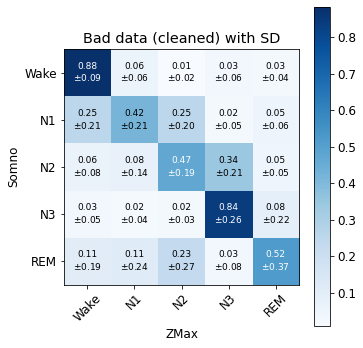

In [4]:
# all bad data nights in cms and mean of each list NO ARO
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [11, 19, 32, 38, 57, 59, 73, 81, 83, 84, 85, 87]
# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('redact_qs1_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    df_KonsensNoAro = df_Konsens.loc[(df_Konsens['else'] == 1)].index
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_KonsensNoAro)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_KonsensNoAro)]


    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'qs_score'})

    # makeing confusion matrix for everz night 

    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['qs_score']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')

    cmn_night = df_confusion_night

    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)



plt.tight_layout()

plt.show()


#makint arraz for matrix, each list in list correcponds a row
DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]
class_list = ['Wake','N1','N2','N3','REM']
# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
print (ArrayDataCMMean)

#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Bad data (cleaned) with SD")
    plt.rc('font', size=12) 
    plt.ylabel('Somno')
    plt.xlabel('ZMax')

# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('Bad_data_cleaned_with_SD.png', bbox_inches='tight')


print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)
print (AllNightsDF['qs_score'].value_counts())
print (AllNightsDF['leo_score'].value_counts())

ValueContsDF = AllNightsDF['qs_score'].value_counts()
ValueContsDF1 = AllNightsDF['leo_score'].value_counts()
SZEpochNumberDFNoAro = pd.concat([ValueContsDF, ValueContsDF1], axis = 1)


print (SZEpochNumberDFNoAro)
SZEpochNumberDFNoAro.to_csv('SZEpochNumberDFNoAro.csv', index = True, sep = '\t')



In [31]:
import pandas as pd
df_number_of_epochs_SZ = pd.read_csv('SZEpochNumberDF.csv', delimiter='\t')
df_number_of_epochs_SZ.columns = ['Sleep stage', 'ZMax', 'Somno consensus']
df_number_of_epochs_SZ = df_number_of_epochs_SZ[['Sleep stage','Somno consensus', 'ZMax', ]]
print (df_number_of_epochs_SZ)

df_number_of_epochs_SZ.style

   Sleep stage  Somno consensus  ZMax
0            0              333  1190
1            1              404   843
2            2             5735  3300
3            3             1163  2903
4            5             1850  1249


,Sleep stage,Somno consensus,ZMax
0,0,333,1190
1,1,404,843
2,2,5735,3300
3,3,1163,2903
4,5,1850,1249


In [33]:
df_number_of_epochs_SZ_no_Aro = pd.read_csv('SZEpochNumberDFnoAro.csv', delimiter='\t')
df_number_of_epochs_SZ_no_Aro.columns = ['Sleep stage', 'ZMax', 'Somno consensus']
df_number_of_epochs_SZ_no_Aro = df_number_of_epochs_SZ_no_Aro[['Sleep stage','Somno consensus', 'ZMax', ]]
print (df_number_of_epochs_SZ_no_Aro)
df_number_of_epochs_SZ_no_Aro.style

   Sleep stage  Somno consensus  ZMax
0            0              325   973
1            1              298   814
2            2             5522  3175
3            3             1144  2868
4            5             1748  1207


,Sleep stage,Somno consensus,ZMax
0,0,325,973
1,1,298,814
2,2,5522,3175
3,3,1144,2868
4,5,1748,1207
